In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("GonzaloA/fake_news")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Convert dataset to DataFrame
df = pd.DataFrame(ds['train'])

In [ ]:
# Display basic information about the dataset
print(df.head())
print(df.info())

   Unnamed: 0                                              title  \
0           0   ‘Maury’ Show Official Facebook Posts F*CKED U...   
1           1   Trump’s Favorite News Channel Tries To Soothe...   
2           2  Russia warns Iraq, Kurds not to destabilize Mi...   
3           3  WATCH STEVE SCALISE Throw A Strike At The Nati...   
4           4   Trump Will HATE What Stephen Colbert Just Did...   

                                                text  label  
0  Maury is perhaps one of the trashiest shows on...      0  
1  Yesterday, after the father of one of the UCLA...      0  
2  MOSCOW (Reuters) - Russia on Wednesday warned ...      1  
3  House Majority Whip Steve Scalise (R., La.) th...      0  
4  It can be said that Late Show host Stephen Col...      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24353 non-null

In [ ]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [ ]:
print(df.head())
print(df.columns)

   Unnamed: 0                                              title  \
0           0   ‘Maury’ Show Official Facebook Posts F*CKED U...   
1           1   Trump’s Favorite News Channel Tries To Soothe...   
2           2  Russia warns Iraq, Kurds not to destabilize Mi...   
3           3  WATCH STEVE SCALISE Throw A Strike At The Nati...   
4           4   Trump Will HATE What Stephen Colbert Just Did...   

                                                text  label  
0  Maury is perhaps one of the trashiest shows on...      0  
1  Yesterday, after the father of one of the UCLA...      0  
2  MOSCOW (Reuters) - Russia on Wednesday warned ...      1  
3  House Majority Whip Steve Scalise (R., La.) th...      0  
4  It can be said that Late Show host Stephen Col...      0  
Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [ ]:
X = df['text']
y = df['label']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_tfidf)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9687949086429891
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2248
           1       0.97      0.97      0.97      2623

    accuracy                           0.97      4871
   macro avg       0.97      0.97      0.97      4871
weighted avg       0.97      0.97      0.97      4871



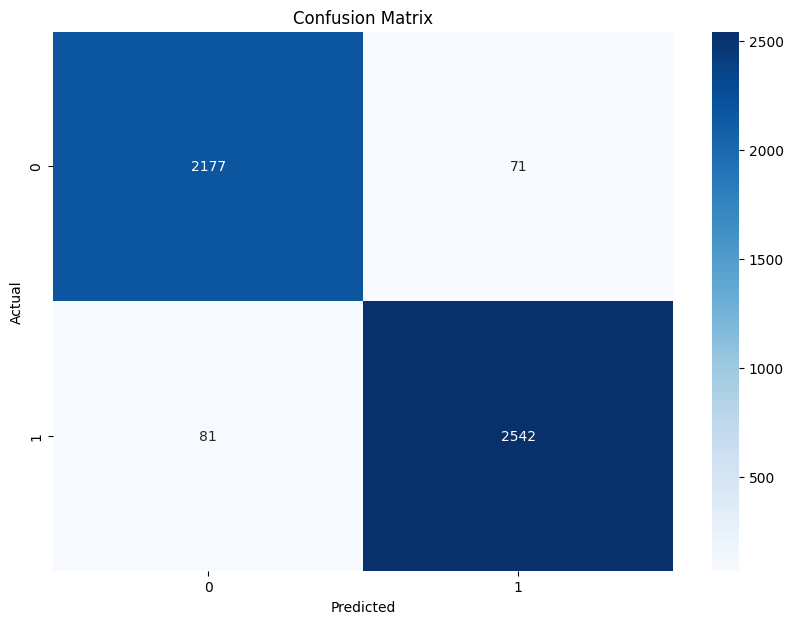

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()